In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Loading the iris dataset with only two classes - Setosa and Virginica so that they are linearly seperable


In [47]:
def load_data():
    URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)
    print(data)
    
    # make the dataset linearly separable
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
    data = np.asmatrix(data, dtype = 'float64')
    return data
data = load_data()

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


## How the classes look like

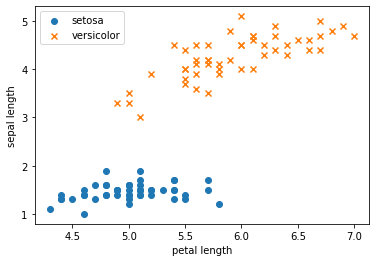

In [48]:
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

In [49]:
print(type(data), data.shape)

features = data[:, :-1]
label = data[:, -1]

print(features.shape, label.shape)

<class 'numpy.matrix'> (100, 5)
(100, 4) (100, 1)


# Perceptron Learning

In [55]:
# Initialize random weights

w = np.zeros(shape=(1, features.shape[1]+1))
print(w.shape)

(1, 5)


In [56]:
# The loop for updating weights

lr = 1 # Learning Rate
num_iters = 5 # or epoch: no. of times to go through the entire dataset
misclassified_lst = [] # to check how many misclassification occurs every epoch

for epoch in range(num_iters):
    misclassified = 0
    for x, label in zip(features, label):
        x = np.insert(x, 0, 1)
        y = np.dot(w, x.transpose())

        target = 1.0 if (y>0) else 0.0

        delta = (label.item(0,0) - target)
        
        if delta:
            w += (lr*delta*x)
            misclassified += 1

    misclassified_lst.append(misclassified)

print(misclassified_lst)

[1, 0, 0, 0, 0]


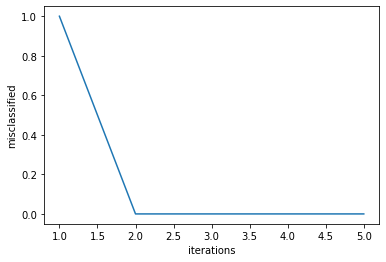

In [57]:
# Graphically lets see misclassifications per epochs

epochs = np.arange(1, num_iters+1)
plt.plot(epochs, misclassified_lst)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

## Lets repeat the procedure for another dataset

In [58]:
# test classification dataset

from sklearn.datasets import make_classification
# define dataset
X, Y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# summarize the dataset
print(X.shape, Y.shape)

(1000, 10) (1000,)


## Lets look at the data for two features

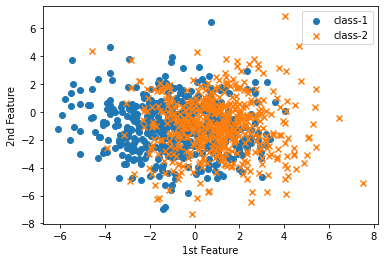

In [59]:
plt.scatter(np.array(X[np.where(Y==0),0]), np.array(X[np.where(Y==0),3]), marker='o', label='class-1')
plt.scatter(np.array(X[np.where(Y==1),0]), np.array(X[np.where(Y==1),3]), marker='x', label='class-2')
plt.xlabel('1st Feature')
plt.ylabel('2nd Feature')
plt.legend()
plt.show()

### Here the classes are not linearly seperable, hence our perceptron model wont be as accurate as above

In [60]:
# Initialize random weights

w = np.zeros(shape=(1, X.shape[1]+1))
print(w.shape)

(1, 11)


In [61]:
lr = 1 # Learning Rate
num_iters = 20 # or epoch: no. of times to go through the entire dataset
misclassified_lst = []

for epoch in range(num_iters):
    misclassified = 0
    for x, label in zip(X, Y):
        x = np.insert(x, 0, 1)
        y = np.dot(w, x.transpose())

        target = 1.0 if (y>0) else 0.0

        delta = (label - target)

        if delta:
            w += (lr*delta*x)
            misclassified += 1

    misclassified_lst.append(misclassified)

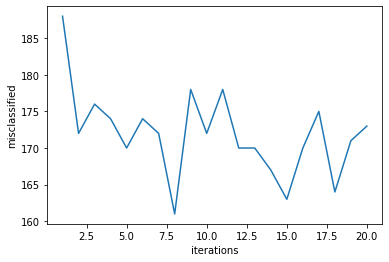

In [62]:
epochs = np.arange(1, num_iters+1)
plt.plot(epochs, misclassified_lst)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

## Lets try change epochs and learning rate to check if model improves here.

In [63]:
w = np.zeros(shape=(1, X.shape[1]+1))

lr = 0.2
num_iters = 40
misclassified_lst = []

for epoch in range(num_iters):
    misclassified = 0
    for x, label in zip(X, Y):
        x = np.insert(x, 0, 1)
        y = np.dot(w, x.transpose())

        target = 1.0 if (y>0) else 0.0

        delta = (label - target)

        if delta:
            w += (lr*delta*x)
            misclassified += 1

    misclassified_lst.append(misclassified)


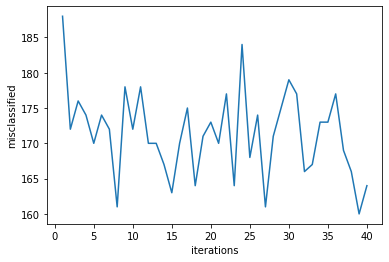

In [64]:
epochs = np.arange(1, num_iters+1)
plt.plot(epochs, misclassified_lst)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()